<a href="https://colab.research.google.com/github/tajski/Projekt-Sieci-Neuronowe/blob/main/Projekt_Sieci_Neuronowe_BT_KW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import bibliotek

In [2]:
import numpy as np
import pandas as pd
import os
from google.colab import drive
from matplotlib import pyplot as plt
from keras.utils import image_dataset_from_directory
from keras import layers, Model
from keras.models import Sequential
from keras.utils import plot_model
from keras.metrics import CategoricalAccuracy, TruePositives, TrueNegatives, FalsePositives, FalseNegatives, Accuracy, binary_accuracy
from keras.applications import ResNet50
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, GlobalAveragePooling2D, Conv2D, MaxPooling2D, Flatten, Dropout

Montaż dysku Google

In [3]:
drive.mount('/content/drive', force_remount=True)
!unzip -q "/content/drive/MyDrive/Colab Notebooks/diabetic.zip"

Mounted at /content/drive


Przygotowanie zbiorów danych

In [4]:
train_data_root = "train"
test_data_root = "test"
valid_data_root = "valid"

train_data = {}
test_data = {}
valid_data = {}

# Przechodzenie przez katalogi treningowe
for root, dirs, files in os.walk(train_data_root):
    for dir in dirs:
        dir_path = os.path.join(root, dir)
        train_data[dir] = os.listdir(dir_path)

print("Dane treningowe:")
for x in train_data:
    print(x, len(train_data[x]))

# Przechodzenie przez katalogi testowe
for root, dirs, files in os.walk(test_data_root):
    for dir in dirs:
        dir_path = os.path.join(root, dir)
        test_data[dir] = os.listdir(dir_path)

print()

print("Dane testowe:")
for x in test_data:
    print(x, len(test_data[x]))

    # Przechodzenie przez katalogi walidacyjne
for root, dirs, files in os.walk(valid_data_root):
    for dir in dirs:
        dir_path = os.path.join(root, dir)
        valid_data[dir] = os.listdir(dir_path)

print()

print("Dane treningowe:")
for x in valid_data:
    print(x, len(valid_data[x]))

Dane treningowe:
No_DR 1026
DR 1050

Dane testowe:
No_DR 118
DR 113

Dane treningowe:
No_DR 286
DR 245


In [5]:
train_dataset, valid_dataset = image_dataset_from_directory(train_data_root, validation_split=0.2,
                                       subset='both',
                                       seed=1410,
                                       image_size=(256, 256),
                                       label_mode='categorical',
                                      color_mode="rgb"
                                       )

test_dataset = image_dataset_from_directory(test_data_root, seed=1410,
                                       image_size=(256, 256),
                                       label_mode='categorical',
                                      color_mode="rgb"
                                       )

Found 2076 files belonging to 2 classes.
Using 1661 files for training.
Using 415 files for validation.
Found 231 files belonging to 2 classes.


['DR', 'No_DR']


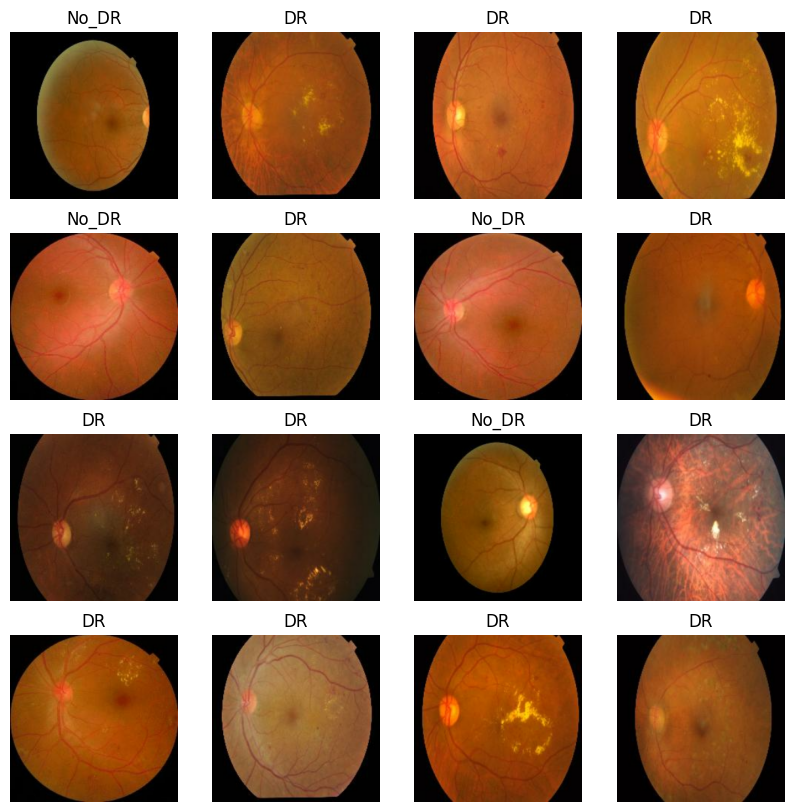

In [6]:
class_names = train_dataset.class_names
print(class_names)

%matplotlib inline
fig, ax = plt.subplots(4,4, figsize=(10,10))


for images, labels in train_dataset.take(1):
    for i in range(16):
        ax = plt.subplot(4,4,i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[int(np.argmax(labels[i]))])
        plt.axis("off")

# **Sieci Konwulcyjne**

Przygotowanie pierwszego modelu z wykorzystaniem sieci konwulcyjnych. Użyte warstwy:


*   Rescaling jako warstwa wejściowa przyjmująca obrazy o rozmiarze 256x256 i 3 kanałach wejścia
*   Warstwy konwulcyjne rosnące od 16 do 1024 ze stałą wielkością jądra jako wektor 2x2
*   Warstwy normalizacyjne
*   Warstwy łączące
*   Warstwa spłaszczająca
*   Warstwy gęste
*   Warstwa porzucania









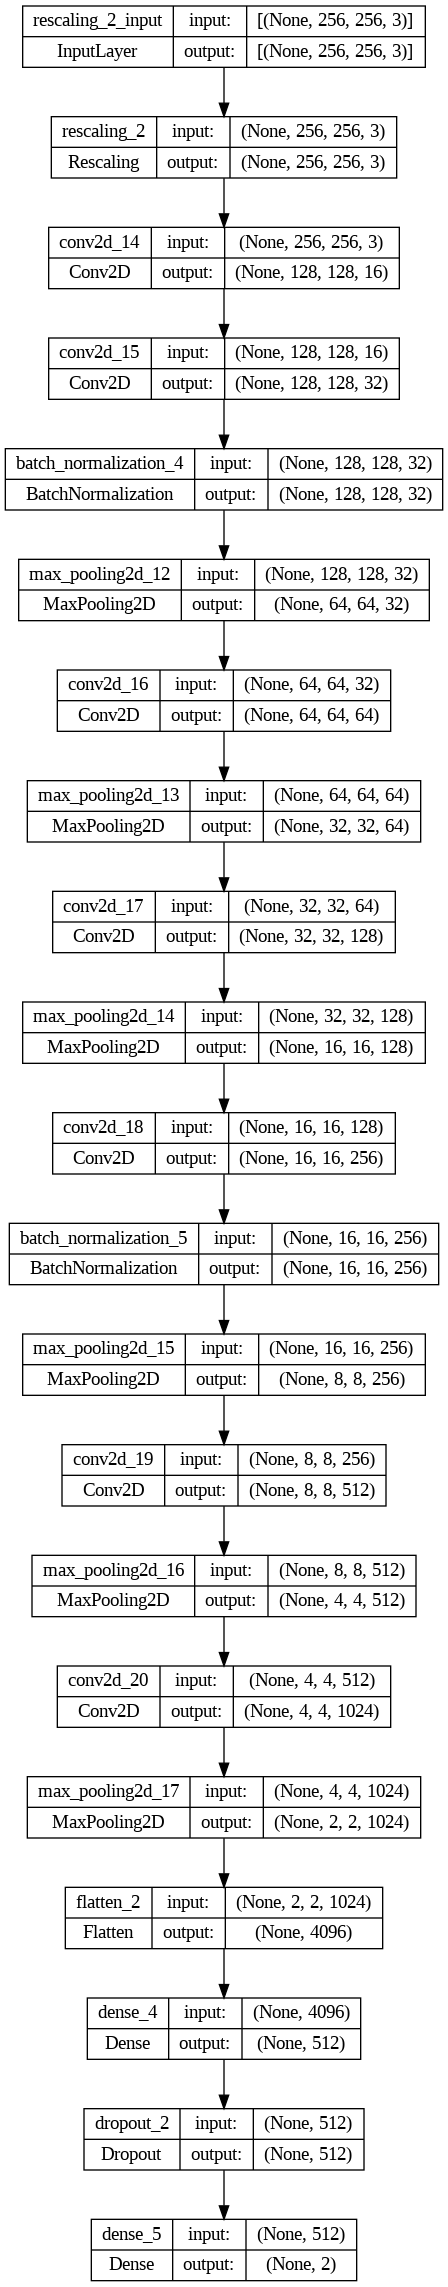

In [ ]:
modelCNN = Sequential([
  layers.Rescaling(1.0 / 255, input_shape=(256, 256, 3)),
  layers.Conv2D(16, (2,2), strides=2, padding='same', activation="relu"),
  layers.Conv2D(32, (2,2), padding='same', activation="relu"),
  layers.BatchNormalization(),
  layers.MaxPooling2D(2),
  layers.Conv2D(64, (2,2), padding='same', activation="relu"),
  layers.MaxPooling2D(2),
  layers.Conv2D(128, (2,2), padding='same', activation="relu"),
  layers.MaxPooling2D(2),
  layers.Conv2D(256, (2,2), padding='same', activation="relu"),
  layers.BatchNormalization(),
  layers.MaxPooling2D(2),
  layers.Conv2D(512, (2,2), padding='same', activation="relu"),
  layers.MaxPooling2D(2),
  layers.Conv2D(1024, (2,2), padding='same', activation="relu"),
  layers.MaxPooling2D(2),
  layers.Flatten(),
  layers.Dense(512, activation="relu"),
  layers.Dropout(0.5),
  layers.Dense(2, activation="softmax")
])
plot_model(modelCNN, show_shapes=True)

Kompilacja pierwszego modelu przy użyciu optymatyzatora "adam" oraz metryki categorical_accuracy.

Uczenie sieci odbywa się natomiast na podstawie wsadu o wielkości 32 oraz 40 epokach.


In [ ]:
# Kompilacja
modelCNN.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy'])


# Uczenie sieci
historyCNN = modelCNN.fit(train_dataset, epochs=40, validation_data=valid_dataset,
                    batch_size=32)

Epoch 1/40
52/52 [==============================] - 6s 59ms/step - loss: 1.0078 - accuracy: 0.7562 - val_loss: 0.7054 - val_accuracy: 0.4916
Epoch 2/40
52/52 [==============================] - 5s 84ms/step - loss: 0.2579 - accuracy: 0.8989 - val_loss: 0.8060 - val_accuracy: 0.4916
Epoch 3/40
52/52 [==============================] - 3s 57ms/step - loss: 0.2090 - accuracy: 0.9163 - val_loss: 0.9010 - val_accuracy: 0.4916
Epoch 4/40
52/52 [==============================] - 3s 58ms/step - loss: 0.1970 - accuracy: 0.9253 - val_loss: 0.7917 - val_accuracy: 0.4916
Epoch 5/40
52/52 [==============================] - 3s 53ms/step - loss: 0.1885 - accuracy: 0.9278 - val_loss: 1.3250 - val_accuracy: 0.4916
Epoch 6/40
52/52 [==============================] - 4s 79ms/step - loss: 0.1719 - accuracy: 0.9440 - val_loss: 1.8102 - val_accuracy: 0.4916
Epoch 7/40
52/52 [==============================] - 3s 57ms/step - loss: 0.1616 - accuracy: 0.9446 - val_loss: 1.3130 - val_accuracy: 0.4916
Epoch 8/40
52

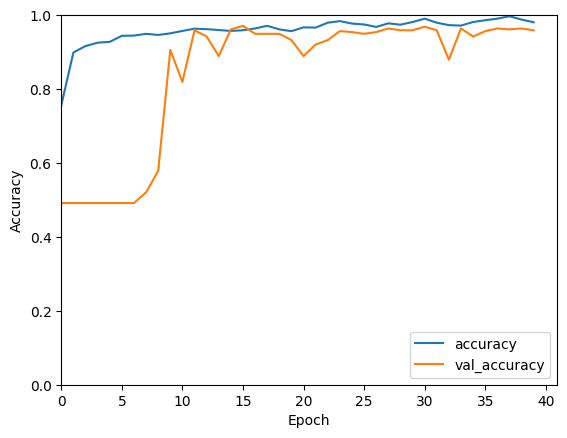

In [ ]:
plt.plot(historyCNN.history['accuracy'], label='accuracy')
plt.plot(historyCNN.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1])
plt.xlim(left=0)
plt.legend(loc='lower right')

In [ ]:
resultCNN = modelCNN.evaluate(test_dataset, return_dict=True)

print(f'Dokładność modelu {round(resultCNN["accuracy"]*100,2)}%')

8/8 [==============================] - 1s 76ms/step - loss: 0.3133 - accuracy: 0.9567
Dokładność modelu 95.67%


Dokładność modelu wynosi 95.67%.

Widoczny jest późny wzrost dokładności z relatywnie małym szumem.

### **Model 2**

Budowa modelu drugiego różni się znacząco od poprzedniego, mianowicie:


*   Brak warstwy normalizacyjnej
*   Warstwa konsulcyjna jako warstwa wejściowa o tych samych parametrach wejściowych
*   Mniejsza liczba warstw konwulcyjnych osiągających maksymalnie wartości 128 filtrów. Jądro jako wektor 3x3.
*   Dodanie warstwy gęstej po środku oraz warstwy porzucania



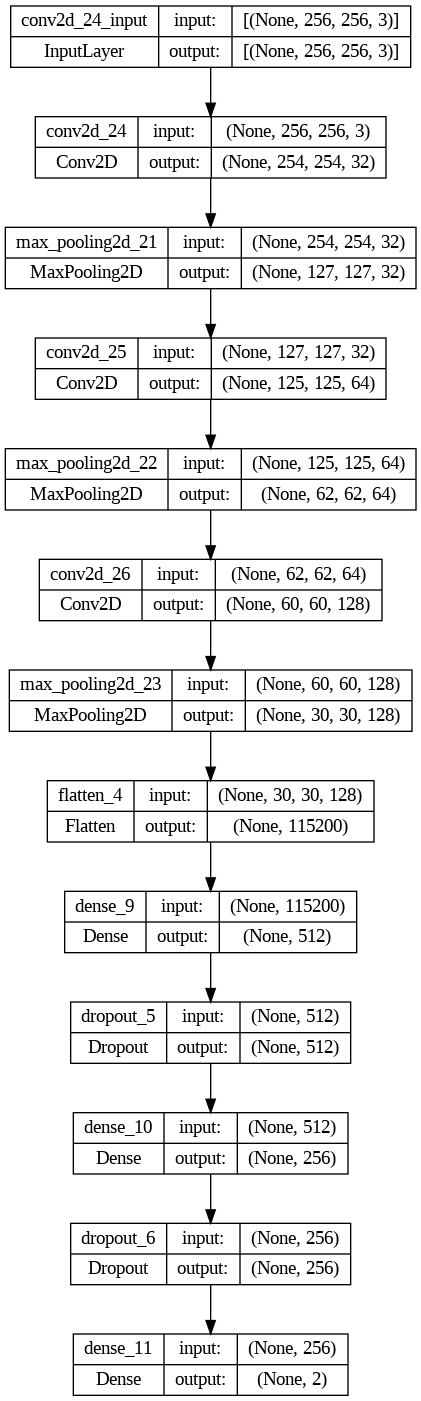

In [ ]:
modelCNN_2 = Sequential([
  layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(64, (3, 3), activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(128, (3, 3), activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dropout(0.5),
  layers.Dense(256, activation='relu'),
  layers.Dropout(0.5),
  layers.Dense(2, activation='softmax')

])
plot_model(modelCNN_2, show_shapes=True)

Liczba epok i wsadu pozostaje niezmienna, tak jak metryka i optymalizator.

In [ ]:
# Kompilacja
modelCNN_2.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy'])


# Uczenie sieci
historyCNN_2 = modelCNN_2.fit(train_dataset, epochs=40, validation_data=valid_dataset,
                    batch_size=32)

Epoch 1/40
52/52 [==============================] - 14s 179ms/step - loss: 37.5620 - accuracy: 0.7989 - val_loss: 0.1734 - val_accuracy: 0.9470
Epoch 2/40
52/52 [==============================] - 5s 89ms/step - loss: 0.2576 - accuracy: 0.9097 - val_loss: 0.1687 - val_accuracy: 0.9349
Epoch 3/40
52/52 [==============================] - 5s 82ms/step - loss: 0.2303 - accuracy: 0.9133 - val_loss: 0.1627 - val_accuracy: 0.9325
Epoch 4/40
52/52 [==============================] - 5s 97ms/step - loss: 0.2293 - accuracy: 0.9157 - val_loss: 0.1674 - val_accuracy: 0.9277
Epoch 5/40
52/52 [==============================] - 6s 109ms/step - loss: 0.2164 - accuracy: 0.9133 - val_loss: 0.1640 - val_accuracy: 0.9373
Epoch 6/40
52/52 [==============================] - 5s 91ms/step - loss: 0.2103 - accuracy: 0.9175 - val_loss: 0.1622 - val_accuracy: 0.9398
Epoch 7/40
52/52 [==============================] - 5s 88ms/step - loss: 0.2025 - accuracy: 0.9199 - val_loss: 0.1515 - val_accuracy: 0.9446
Epoch 8/4

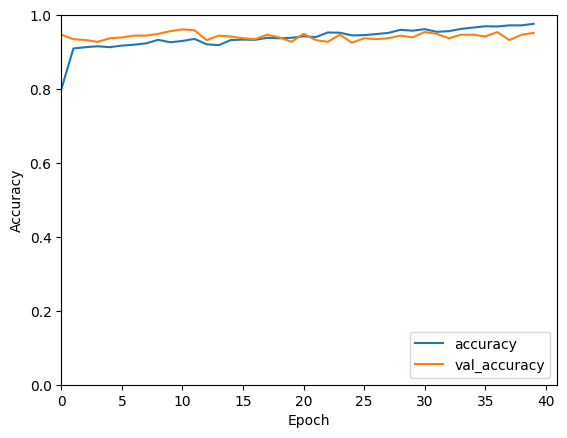

In [ ]:
plt.plot(historyCNN_2.history['accuracy'], label='accuracy')
plt.plot(historyCNN_2.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1])
plt.xlim(left=0)
plt.legend(loc='lower right')

In [ ]:
resultCNN_2 = modelCNN_2.evaluate(test_dataset, return_dict=True)

print(f'Dokładność modelu {round(resultCNN_2["accuracy"]*100,2)}%')

8/8 [==============================] - 1s 60ms/step - loss: 0.4135 - accuracy: 0.9351
Dokładność modelu 93.51%


Pomimo mniejszej dokładności modelu, od samego początku dokładność pozostaje na podobnym, wysokim poziomie i szum jest widocznie mniejszy.

### **Model 3**

Model trzeci jest rozwinięciem modelu pierwszego. Warstwą wejściową jest warstwa konwulcyjna oraz dodana jest warstwa gęsta i warstwa porzucająca pod koniec sekwencji.

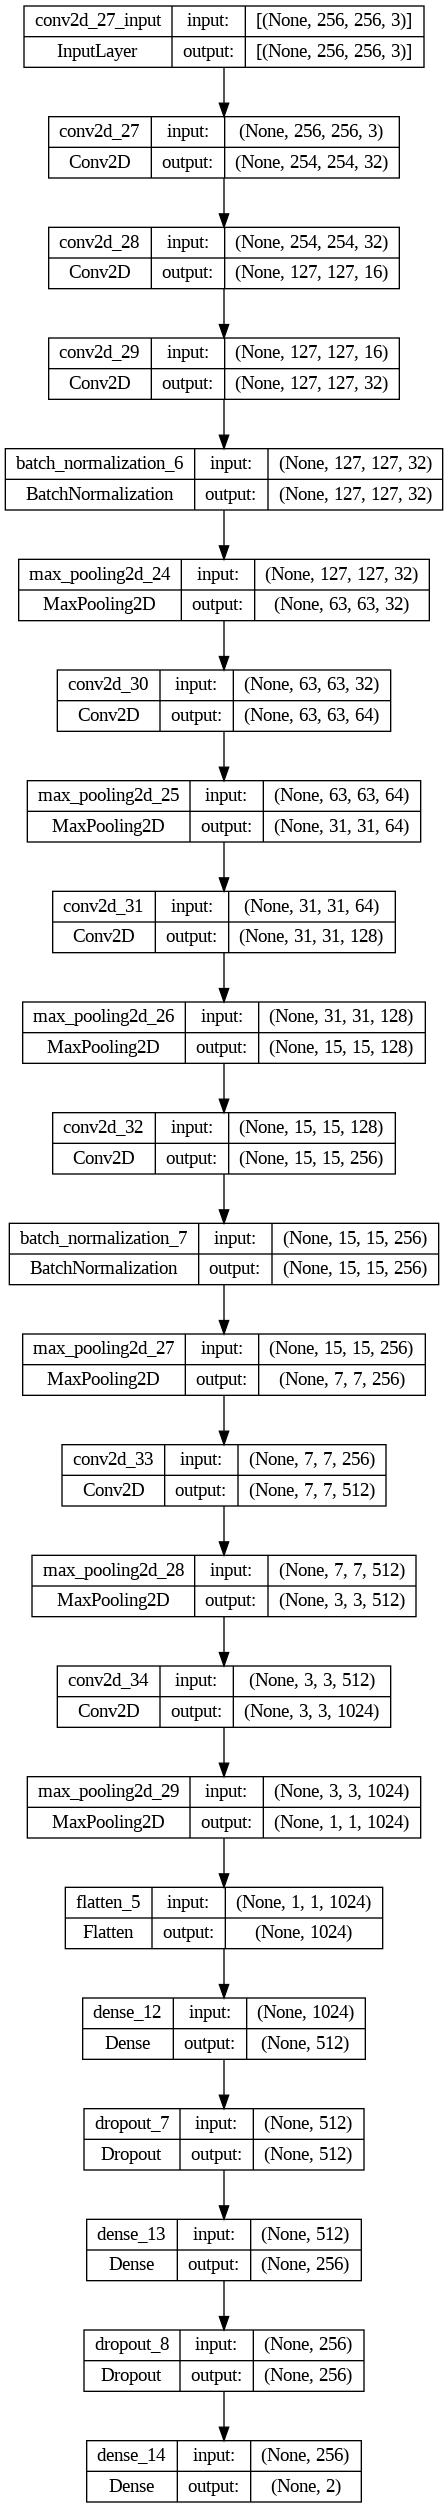

In [ ]:
modelCNN_3 = Sequential([
  layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
  layers.Conv2D(16, (2,2), strides=2, padding='same', activation="relu"),
  layers.Conv2D(32, (2,2), padding='same', activation="relu"),
  layers.BatchNormalization(),
  layers.MaxPooling2D(2),
  layers.Conv2D(64, (2,2), padding='same', activation="relu"),
  layers.MaxPooling2D(2),
  layers.Conv2D(128, (2,2), padding='same', activation="relu"),
  layers.MaxPooling2D(2),
  layers.Conv2D(256, (2,2), padding='same', activation="relu"),
  layers.BatchNormalization(),
  layers.MaxPooling2D(2),
  layers.Conv2D(512, (2,2), padding='same', activation="relu"),
  layers.MaxPooling2D(2),
  layers.Conv2D(1024, (2,2), padding='same', activation="relu"),
  layers.MaxPooling2D(2),
  layers.Flatten(),
  layers.Dense(512, activation="relu"),
  layers.Dropout(0.5),
  layers.Dense(256, activation='relu'),
  layers.Dropout(0.5),
  layers.Dense(2, activation="softmax")
])
plot_model(modelCNN_3, show_shapes=True)

In [ ]:
# Kompilacja
modelCNN_3.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy'])


# Uczenie sieci
historyCNN_3 = modelCNN_3.fit(train_dataset, epochs=50, validation_data=valid_dataset,
                    batch_size=64)

Epoch 1/50
52/52 [==============================] - 12s 125ms/step - loss: 0.7618 - accuracy: 0.7977 - val_loss: 0.7259 - val_accuracy: 0.5108
Epoch 2/50
52/52 [==============================] - 4s 68ms/step - loss: 0.2580 - accuracy: 0.8946 - val_loss: 0.5897 - val_accuracy: 0.6048
Epoch 3/50
52/52 [==============================] - 4s 78ms/step - loss: 0.2299 - accuracy: 0.9055 - val_loss: 0.5188 - val_accuracy: 0.6241
Epoch 4/50
52/52 [==============================] - 4s 67ms/step - loss: 0.2347 - accuracy: 0.9187 - val_loss: 0.4893 - val_accuracy: 0.7036
Epoch 5/50
52/52 [==============================] - 4s 68ms/step - loss: 0.2128 - accuracy: 0.9211 - val_loss: 0.3575 - val_accuracy: 0.9012
Epoch 6/50
52/52 [==============================] - 5s 87ms/step - loss: 0.2128 - accuracy: 0.9145 - val_loss: 0.2727 - val_accuracy: 0.9012
Epoch 7/50
52/52 [==============================] - 4s 68ms/step - loss: 0.2142 - accuracy: 0.9278 - val_loss: 0.2762 - val_accuracy: 0.8795
Epoch 8/50


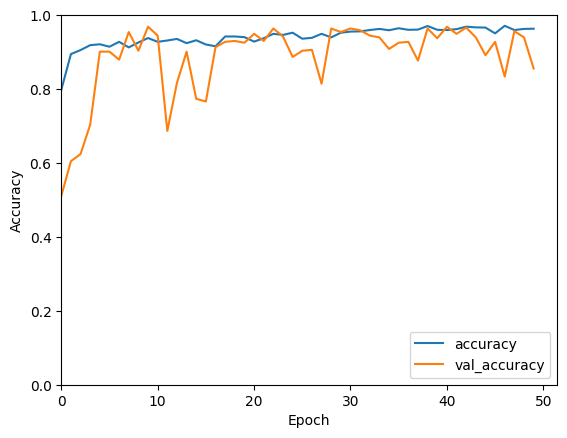

In [ ]:
plt.plot(historyCNN_3.history['accuracy'], label='accuracy')
plt.plot(historyCNN_3.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1])
plt.xlim(left=0)
plt.legend(loc='lower right')

In [ ]:
resultCNN_3 = modelCNN_3.evaluate(test_dataset, return_dict=True)

print(f'Dokładność modelu {round(resultCNN_3["accuracy"]*100,2)}%')

8/8 [==============================] - 1s 83ms/step - loss: 0.4354 - accuracy: 0.8052
Dokładność modelu 80.52%


Dokładność modelu znacznie się zmniejszyła (tj. o ponad 15%!). Pomimo szybszego wzrostu dokładności, ta szybko zaczyna się mocno wahać. Nie jest to z pewnością dobry kierunek optymalizacji.

# **Uczenie Transferowe z zamrożonymi warstwami**

Wczytywana jest funkcja ResNet50, będąca jedną z topowych funkcji uczonych na ImageNet, do uczenia transferowego na modelach z obrazami jako wejściem.

In [90]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
for layer in base_model.layers:
    layer.trainable = False

Budowany jest model oraz dodane warstwy GlobalAveragePooling2D (łącząco-spłaszczająca) oraz dwie warstwy gęste.
Następnie tworzony jest model do którego ładowane są wagi z pre-trenowanego modelu.

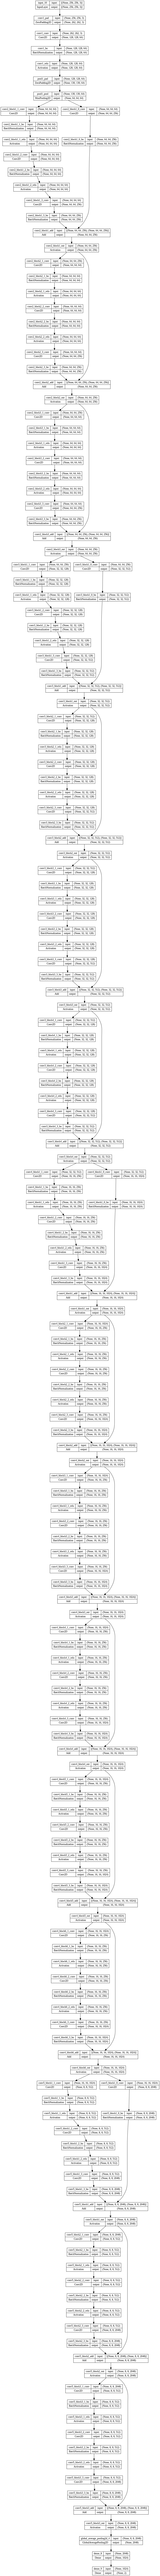

In [91]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)

# Stworzenie końcowego modelu
modelTL = Model(inputs=base_model.input, outputs=predictions)
plot_model(modelTL, show_shapes=True)

Model kompilowany jest znów z optymalizatorem Adam oraz metryką categorical_accuracy. Następnie trening zachodzi na zbiorze treningowym przy 40 epokach.

In [92]:
# Kompilacja modelu
modelTL.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Trening modelu
historyTL = modelTL.fit(train_dataset, validation_data=valid_dataset, epochs=40)

Epoch 1/40
52/52 [==============================] - 15s 198ms/step - loss: 0.3982 - accuracy: 0.8989 - val_loss: 0.1218 - val_accuracy: 0.9590
Epoch 2/40
52/52 [==============================] - 9s 159ms/step - loss: 0.1400 - accuracy: 0.9542 - val_loss: 0.0762 - val_accuracy: 0.9783
Epoch 3/40
52/52 [==============================] - 8s 158ms/step - loss: 0.1042 - accuracy: 0.9681 - val_loss: 0.0818 - val_accuracy: 0.9759
Epoch 4/40
52/52 [==============================] - 8s 158ms/step - loss: 0.0867 - accuracy: 0.9717 - val_loss: 0.0892 - val_accuracy: 0.9711
Epoch 5/40
52/52 [==============================] - 8s 156ms/step - loss: 0.1036 - accuracy: 0.9669 - val_loss: 0.0952 - val_accuracy: 0.9639
Epoch 6/40
52/52 [==============================] - 9s 174ms/step - loss: 0.0945 - accuracy: 0.9639 - val_loss: 0.0787 - val_accuracy: 0.9759
Epoch 7/40
52/52 [==============================] - 8s 152ms/step - loss: 0.0555 - accuracy: 0.9801 - val_loss: 0.0945 - val_accuracy: 0.9735
Epoch

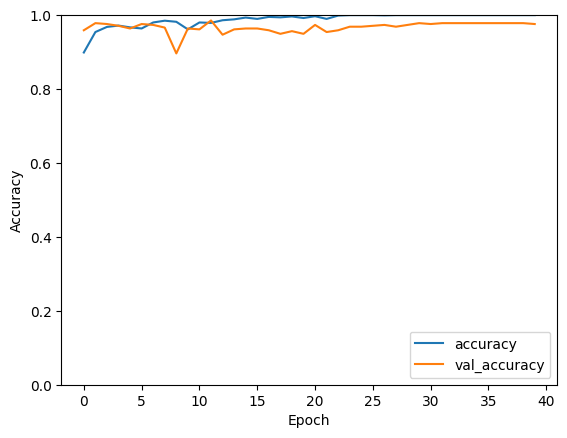

In [94]:
plt.plot(historyTL.history['accuracy'], label='accuracy')
plt.plot(historyTL.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1])
plt.legend(loc='lower right')

In [95]:
resultTL = modelTL.evaluate(test_dataset, return_dict=True)

print(f'Dokładność modelu {round(resultTL["accuracy"]*100,2)}%')

8/8 [==============================] - 1s 110ms/step - loss: 0.1600 - accuracy: 0.9697
Dokładność modelu 96.97%


Dokładność modelu jest obecnie najwyższą osiągniętą podczas projektu. Od początku treningu jest ona na wysokim poziomie, jednakże w jednym punkcie (około 10 epoki) dochodzi do krótkotrwałego przeuczenia modelu.

### Kompilacja przy użyciu metryki binary_crossentropy

Ten sam model jest kompilowany jednakże przy użyciu metryki binary_accuracy.

In [96]:
# Kompilacja modelu
modelTL_2 = modelTL
modelTL_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=[binary_accuracy])

# Trening modelu
historyTL_2 = modelTL_2.fit(train_dataset, validation_data=valid_dataset, epochs=40)

Epoch 1/40
52/52 [==============================] - 13s 175ms/step - loss: 0.0402 - binary_accuracy: 0.9856 - val_loss: 0.0749 - val_binary_accuracy: 0.9735
Epoch 2/40
52/52 [==============================] - 8s 156ms/step - loss: 0.0091 - binary_accuracy: 0.9994 - val_loss: 0.0830 - val_binary_accuracy: 0.9735
Epoch 3/40
52/52 [==============================] - 8s 155ms/step - loss: 0.0061 - binary_accuracy: 1.0000 - val_loss: 0.0865 - val_binary_accuracy: 0.9783
Epoch 4/40
52/52 [==============================] - 8s 154ms/step - loss: 0.0048 - binary_accuracy: 1.0000 - val_loss: 0.0854 - val_binary_accuracy: 0.9759
Epoch 5/40
52/52 [==============================] - 8s 157ms/step - loss: 0.0037 - binary_accuracy: 1.0000 - val_loss: 0.1012 - val_binary_accuracy: 0.9663
Epoch 6/40
52/52 [==============================] - 8s 157ms/step - loss: 0.0032 - binary_accuracy: 1.0000 - val_loss: 0.1003 - val_binary_accuracy: 0.9663
Epoch 7/40
52/52 [==============================] - 8s 153ms/st

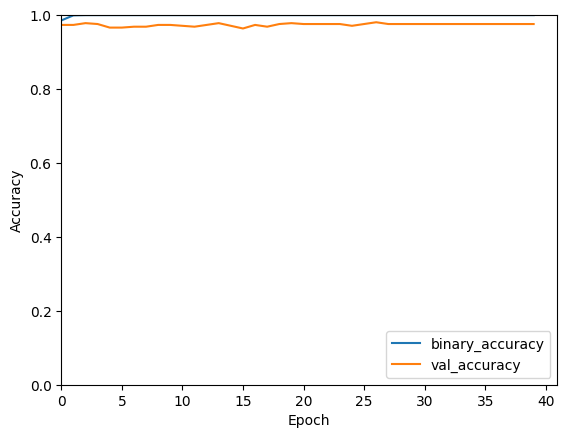

In [97]:
plt.plot(historyTL_2.history['binary_accuracy'], label='binary_accuracy')
plt.plot(historyTL_2.history['val_binary_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1])
plt.xlim(left=0)
plt.legend(loc='lower right')

In [98]:
resultTL_2 = modelTL_2.evaluate(test_dataset, return_dict=True)

print(f'Dokładność modelu {round(resultTL_2["binary_accuracy"]*100,2)}%')

8/8 [==============================] - 1s 111ms/step - loss: 0.1967 - binary_accuracy: 0.9740
Dokładność modelu 97.4%


W tym wypadku wynik nie dość że jest jeszcze lepszy to nie zawiera widocznych szumów.

# **Uczenie transferowe z odmrożeniem warstw**

In [99]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_10 (InputLayer)       [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_10[0][0]']            
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [100]:
for layer in base_model.layers:
    if layer.name in ['conv5_block3_3_conv', 'conv5_block3_2_conv', 'conv5_block3_1_conv']:
        layer.trainable = True

    if layer.trainable:
        print(layer.name)

conv5_block3_1_conv
conv5_block3_2_conv
conv5_block3_3_conv


In [101]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_10 (InputLayer)       [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_10[0][0]']            
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

W tym modelu zostają odmrożone wybrane warstwy konwulcyjne oraz kompilowany i trenowany jest model bazujący na metryce binary_accuracy.

In [102]:
# Kompilacja modelu
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)

modelTL_PUF = Model(inputs=base_model.input, outputs=predictions)
modelTL_PUF.compile(optimizer='adam', loss='binary_crossentropy', metrics=[binary_accuracy])

# Trening modelu
historyTL_PUF = modelTL_PUF.fit(train_dataset, validation_data=valid_dataset, epochs=40)

Epoch 1/40
52/52 [==============================] - 15s 187ms/step - loss: 0.3218 - binary_accuracy: 0.9097 - val_loss: 0.1891 - val_binary_accuracy: 0.9349
Epoch 2/40
52/52 [==============================] - 9s 169ms/step - loss: 0.1471 - binary_accuracy: 0.9567 - val_loss: 0.1206 - val_binary_accuracy: 0.9614
Epoch 3/40
52/52 [==============================] - 9s 171ms/step - loss: 0.0981 - binary_accuracy: 0.9699 - val_loss: 0.1567 - val_binary_accuracy: 0.9325
Epoch 4/40
52/52 [==============================] - 9s 168ms/step - loss: 0.0919 - binary_accuracy: 0.9711 - val_loss: 0.0876 - val_binary_accuracy: 0.9759
Epoch 5/40
52/52 [==============================] - 9s 173ms/step - loss: 0.0870 - binary_accuracy: 0.9717 - val_loss: 0.0897 - val_binary_accuracy: 0.9663
Epoch 6/40
52/52 [==============================] - 9s 169ms/step - loss: 0.0546 - binary_accuracy: 0.9843 - val_loss: 0.0686 - val_binary_accuracy: 0.9735
Epoch 7/40
52/52 [==============================] - 9s 166ms/st

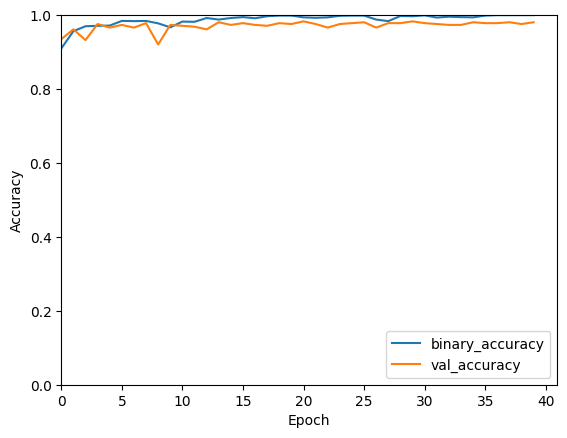

In [103]:
plt.plot(historyTL_PUF.history['binary_accuracy'], label='binary_accuracy')
plt.plot(historyTL_PUF.history['val_binary_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1])
plt.xlim(left=0)
plt.legend(loc='lower right')

In [104]:
resultTL_PUF = modelTL_PUF.evaluate(test_dataset, return_dict=True)

print(f'Dokładność modelu {round(resultTL_PUF["binary_accuracy"]*100,2)}%')

8/8 [==============================] - 1s 110ms/step - loss: 0.2824 - binary_accuracy: 0.9740
Dokładność modelu 97.4%


Model ten cechuje się tą samą dokładnością, jednakże widoczny jest również jeden moment drobnego przeuczenia. Wydaje się natomiast że po zredukowaniu go, dokładność byłaby większa niż w modelu z zamrożonymi warstwami.

## Odmrożenie większej ilości warstw

W tym przyadpku odmrożone zostają wszystkie warstwy z kategorii conv5.

In [105]:
for layer in base_model.layers:
    if layer.name.startswith('conv5'):
        layer.trainable = True

    if layer.trainable:
        print(layer.name)

conv5_block1_1_conv
conv5_block1_1_bn
conv5_block1_1_relu
conv5_block1_2_conv
conv5_block1_2_bn
conv5_block1_2_relu
conv5_block1_0_conv
conv5_block1_3_conv
conv5_block1_0_bn
conv5_block1_3_bn
conv5_block1_add
conv5_block1_out
conv5_block2_1_conv
conv5_block2_1_bn
conv5_block2_1_relu
conv5_block2_2_conv
conv5_block2_2_bn
conv5_block2_2_relu
conv5_block2_3_conv
conv5_block2_3_bn
conv5_block2_add
conv5_block2_out
conv5_block3_1_conv
conv5_block3_1_bn
conv5_block3_1_relu
conv5_block3_2_conv
conv5_block3_2_bn
conv5_block3_2_relu
conv5_block3_3_conv
conv5_block3_3_bn
conv5_block3_add
conv5_block3_out


In [106]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_10 (InputLayer)       [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_10[0][0]']            
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [107]:
# Kompilacja modelu
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)

modelTL_PUF_2 = Model(inputs=base_model.input, outputs=predictions)
modelTL_PUF_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=[binary_accuracy])

# Trening modelu
historyTL_PUF2 = modelTL_PUF_2.fit(train_dataset, validation_data=valid_dataset, epochs=40)

Epoch 1/40
52/52 [==============================] - 20s 214ms/step - loss: 0.1971 - binary_accuracy: 0.9374 - val_loss: 0.1764 - val_binary_accuracy: 0.9759
Epoch 2/40
52/52 [==============================] - 11s 200ms/step - loss: 0.0891 - binary_accuracy: 0.9729 - val_loss: 2.8879 - val_binary_accuracy: 0.7590
Epoch 3/40
52/52 [==============================] - 11s 202ms/step - loss: 0.0493 - binary_accuracy: 0.9849 - val_loss: 0.4126 - val_binary_accuracy: 0.9036
Epoch 4/40
52/52 [==============================] - 12s 218ms/step - loss: 0.0349 - binary_accuracy: 0.9892 - val_loss: 0.1863 - val_binary_accuracy: 0.9614
Epoch 5/40
52/52 [==============================] - 10s 196ms/step - loss: 0.0586 - binary_accuracy: 0.9795 - val_loss: 1.5928 - val_binary_accuracy: 0.9253
Epoch 6/40
52/52 [==============================] - 11s 196ms/step - loss: 0.0212 - binary_accuracy: 0.9940 - val_loss: 0.1269 - val_binary_accuracy: 0.9855
Epoch 7/40
52/52 [==============================] - 10s 19

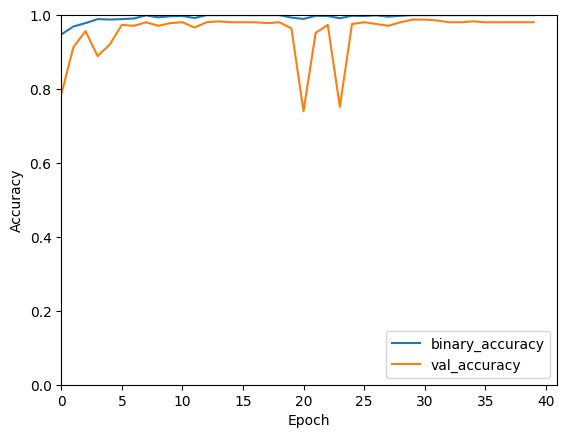

In [108]:
plt.plot(historyTL_PUF2.history['binary_accuracy'], label='binary_accuracy')
plt.plot(historyTL_PUF2.history['val_binary_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1])
plt.xlim(left=0)
plt.legend(loc='lower right')

In [109]:
resultTL_PUF_2 = modelTL_PUF_2.evaluate(test_dataset, return_dict=True)

print(f'Dokładność modelu {round(resultTL_PUF_2["binary_accuracy"]*100,2)}%')

8/8 [==============================] - 1s 114ms/step - loss: 0.3743 - binary_accuracy: 0.9740
Dokładność modelu 97.4%


Widocznie zwiększenie ilości odmrożonych warstw nie wpłynęło lepiej na wynik dokładności. Jest ona taka sama jak w przyapdku poprzednich dwóch modeli, jednak dochodzi do sporego przeuczenia w okolicach 20 epoki.

Wydaje się że dalszą drogą optymalizacji mogłoby być odmrożenie mniejszej, ilości warstw, być może nie konwulcyjnych.